# Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

Dans le cadre de cette exercice évalué par les pairs (Mooc RR, mod3) j'ai choisi le sujet n°2 intitulé :
**Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle**

## Contexte de l'étude

William Playfair un des pionnier de la représentation graphique des données, a réalisé un graphique montrant l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. Ce graphique a été publié en 1822 dans son livre *A Letter on our Agricultural Distresses, Their Causes and Remedies*. Ci-dessous une reproduction hébergée sur [Wikipédia][graph original].

![Chart Showing at One View the Price of the Quarter of Wheat, and Wages of Labour by the Week, from 1565 to 1821](playfair_ori_prixble_salaire.png)

[graph original]:https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png

Le premier objectif de l'étude est de reproduire ce graphe, puis dans un second temps de corriger le graphique.Een effet W. Playfair a utilisé la même unité pour représenter deux quantités différentes sur l'axe des ordonnées. Enfin dans un troisième temps le but sera d'améliorer la représentation du pouvoir d'achat des agriculteurs anglais sur cette période.

## Les données

### Sources

W. Playfair n'a pas publié les données numériques brutes de son étude. Néanmoins une version numérisée est diponible [ici][data_url], réalisé par [Vincent Arel-Bundock] et publié sur son site [R datasets][vab r datasets].

[data_url]: https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv
[Vincent Arel-Bundock]: https://github.com/vincentarelbundock
[vab r datasets]: https://vincentarelbundock.github.io/Rdatasets/


In [138]:
# import des bibliothèques
import urllib
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
%matplotlib inline

In [139]:
# téléchargement du fichier
data_url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'
filename = 'Wheat.csv'

curFiles = set(listdir())

# téléchargement automatique du fichier
# si non présent dans le répertoire
if not(filename in curFiles):
    print('Téléchargement du fichier')
    urllib.request.urlretrieve(data_url, filename)
else:
    print('Fichier déjà téléchargé')

listdir()

Fichier déjà téléchargé


['exercice_python_en.org',
 'exercice_fr.ipynb',
 'Wheat.csv',
 'exercice.ipynb',
 'exercice_fr.Rmd',
 'playfair_ori_prixble_salaire.png',
 'exercice_python_fr.org',
 'exercice_R_en.org',
 'exercice_R_fr.org',
 'exercice_en.Rmd',
 'exercice_en.ipynb',
 '.ipynb_checkpoints']

In [140]:
# lecture du fichier
rawdata = pd.read_csv(filename, index_col=0)

In [141]:
rawdata.head()

Year  Wheat  Wages
1  1565   41.0   5.00
2  1570   45.0   5.05
3  1575   42.0   5.08
4  1580   49.0   5.12
5  1585   41.5   5.15

### Vérification des données

Les données sont vérifiées sur les critères suivants :

* présence de lignes vides
* rupture de date, ou division non régulière

Il est à noter les données sont enregistrées tous les 5 ans.

In [142]:
# présence de lignes vides
rawdata[rawdata.isnull().any(axis=1)]

Year  Wheat  Wages
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN

Les 3 dernières lignes sont vides pour la colonne *Wages*, ce qui explique l'arrêt de la ligne rouge et de la surface bleue dans le document originale.

In [143]:
# rupture de date, ou division non régulière
print("Années de rupture :")
expect_delta = 5
for y1, y2 in zip(rawdata['Year'][:-1], rawdata['Year'][1:]):
    delta_y = y2 - y1
    if delta_y != expect_delta :
        print(y1)

Années de rupture :
1820


Seule l'année 1820 présente une rupture. En effet l'enregistrement suivant est 1821. Ce qui explique la barre moins large sur le graphique original, pour les années 1820 à 1821.

### Commentaire sur les unités

Pour rappel les untités originales des données sont les suivantes :
* Blé (Wheat) : Shillings pour un quart de boisseau (8,6 kg)
* Salaire (Wages) : Shillings par semaine

Avant 1971, la monnaie anglaise était découpée de la manière suivante :
* 1 Livre valait 20 shillings
* 1 Shilling valait 12 penses

## Reproduction du graphique original

Ci-dessous le graphique original est reproduit à l'aide de `Matplotlib`.
(Pour représenter des dégradés voir ce lien : https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/gradient_bar.html?highlight=gradient)

Les années 1820 et 1821 sont représentées séparémment du reste des données afin d'avoir une barre de largeur différente (voir le code ci-dessous).

In [ ]:
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

fig1, ax1 = plt.subplots(1,1)

fig1.set_size_inches(2.54*6, 2.54*3)

# === représentation du prix du blé === #
ax1.bar(rawdata['Year'][:-2], rawdata['Wheat'][:-2], align='edge', width=5, color='dimgrey')
# bar de largeur 1 année pour les deux années 1820 et 1821
ax1.bar(rawdata['Year'][-2:], rawdata['Wheat'][-2:], align='edge', width=1, color='dimgrey')

# graduation proche de l'original, avec les siècles comme majeure
# et une graduation mineure tous les 5 ans
# aide sur les ticks locator :
# https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html#sphx-glr-gallery-ticks-and-spines-tick-locators-py
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(5))

ax1.grid(True, which='both')

# les marges de l'axe x sont diminuées
ax1.set_xlim([int(rawdata['Year'][0:1]), int(rawdata['Year'][-1:]+5)])

ax1.set_xlabel('5 Years each division')

# === représentation du salaire === #
# l'axe 2 partage l'axe x de l'axe 1
ax2 = ax1.twinx()
ax2.fill_between(rawdata['Year'], rawdata['Wages'])
ax2.plot(rawdata['Year'], rawdata['Wages'], 'r', linewidth=2)

# les deux axes ont les mêmes limites, pour reproduire l'original
myylim = ax1.get_ylim()
ax2.set_ylim(myylim)

ax2.set_ylabel('Price of the Quarter of Wheat in Shillings')

ax1.set_title("""Chart Showing at One View
the Price of the Quarter of Wheat, and Wages of Labour
by the Week, from 1565 to 1821""")



## Graphique avec deux axes des ordonnées
Le graphique précédent est repris et amélioré avec deux axes distincts cette fois-ci.
Le jeu de couleur est changé pour un affichage plus lisible.
La conversion vers l'unité moderne est ajouté en légende de l'axe y, pour information.

Text(0.5,1,'Chart Showing at One View\nthe Price of the Quarter of Wheat, and Wages of Labour\nby the Week, from 1565 to 1821')

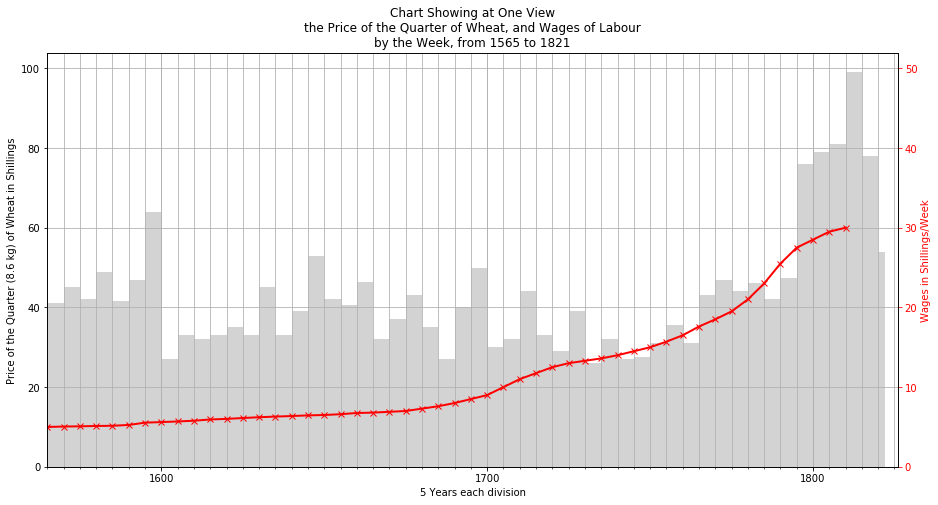

In [161]:
fig2, ax11 = plt.subplots(1,1)

fig2.set_size_inches(2.54*6, 2.54*3)

# === représentation du prix du blé === #
ax11.bar(rawdata['Year'][:-2], rawdata['Wheat'][:-2], align='edge', width=5, color='lightgrey')
ax11.bar(rawdata['Year'][-2:], rawdata['Wheat'][-2:], align='edge', width=1, color='lightgrey')

# graduation proche de l'original, avec les siècles comme majeure
# et une graduation mineure tous les 5 ans
ax11.xaxis.set_major_locator(MultipleLocator(100))
ax11.xaxis.set_minor_locator(MultipleLocator(5))
# grille
ax11.grid(True, which='both')

ax11.set_xlabel('5 Years each division')
ax11.set_ylabel('Price of the Quarter (8.6 kg) of Wheat in Shillings')

# les marges de l'axe x sont diminuées
ax11.set_xlim([int(rawdata['Year'][0:1]), int(rawdata['Year'][-1:]+5)])

# === représentation du salaire === #
# l'axe 2 partage l'axe x de l'axe 1
ax12 = ax11.twinx()
ax12.plot(rawdata['Year'], rawdata['Wages'], 'r', linewidth=2, marker='x')

# les deux axes ont des limites différentes pour montrer que les axes sont différents
myylim = ax11.get_ylim()
ax12.set_ylim([0,myylim[1]/2])

ax12.set_ylabel('Wages in Shillings/Week')
ax12.yaxis.label.set_color('r')
ax12.tick_params(axis='y', colors='r')

ax11.set_title("""Chart Showing at One View
the Price of the Quarter of Wheat, and Wages of Labour
by the Week, from 1565 to 1821""")


## Représentation du pouvoir d'achat

Le pouvoir d'achat est définie ici comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire. 

Le prix du blé par boisseau est converti en prix du blé par kg pour une représentation plus moderne.
Le pouvoir d'achat sera donc exprimé en kg de blé par semaine.

Pour rappel, les années 1815, 1820, 1821 n'ont pas de salaire hebdomadaire renseigné. Ces lignes sont retirées pour le calcul du pouvoir d'achat.

In [164]:
# === on supprime les années sans salaires === #
print("lignes supprimées :")
print(rawdata[rawdata.isnull().any(axis=1)])
data = rawdata.dropna().copy()

# === facteurs de conversion === #
quarter_to_mass = 8.6  # in kg
shilling_to_pence = 12

purchasing_power = data['Wages']/(data['Wheat']/quarter_to_mass)
purchasing_power.head()

lignes supprimées :
    Year  Wheat  Wages
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN


1    1.048780
2    0.965111
3    1.040190
4    0.898612
5    1.067229
dtype: float64

In [175]:
fig3, ax31 = plt.subplots(1,1)
fig3.set_size_inches(2.54*6, 2.54*3)

ax31.bar(data['Year'], purchasing_power, align='edge', width=5)

# les mêmes limites que précédemment sont conservées pour comparaison
ax31.set_xlim([int(rawdata['Year'][0:1]), int(rawdata['Year'][-1:]+5)])

# graduation proche de l'original, avec les siècles comme majeure
# et une graduation mineure tous les 5 ans
ax31.xaxis.set_major_locator(MultipleLocator(100))
ax31.xaxis.set_minor_locator(MultipleLocator(5))

ax31.xaxis.set_major_formatter(DateFormatter('%Y'))
ax31.xaxis.set_minor_formatter(DateFormatter('%y'))


ax31.grid(True, which='both')

ax31.set_xlabel("Année")
ax31.set_ylabel("Pouvoir d'achat en masse de blé hebdomadaire [kg/sem]")

ax31.set_title("Pouvoir d'achat d'un ouvrier\n en équivalent masse de blé hebdomadaire\n de 1565 à 1810")

fig3.autofmt_xdate()

NameError: name 'DateFormatter' is not defined

Error in callback <function flush_figures at 0x7ff2a9a526a8> (for post_execute):


KeyboardInterrupt: 

In [160]:
purchasing_power[-2:]

52   NaN
53   NaN
dtype: float64

In [63]:
rawdata

Year  Wheat  Wages
1   1565   41.0   5.00
2   1570   45.0   5.05
3   1575   42.0   5.08
4   1580   49.0   5.12
5   1585   41.5   5.15
6   1590   47.0   5.25
7   1595   64.0   5.54
8   1600   27.0   5.61
9   1605   33.0   5.69
10  1610   32.0   5.78
11  1615   33.0   5.94
12  1620   35.0   6.01
13  1625   33.0   6.12
14  1630   45.0   6.22
15  1635   33.0   6.30
16  1640   39.0   6.37
17  1645   53.0   6.45
18  1650   42.0   6.50
19  1655   40.5   6.60
20  1660   46.5   6.75
21  1665   32.0   6.80
22  1670   37.0   6.90
23  1675   43.0   7.00
24  1680   35.0   7.30
25  1685   27.0   7.60
26  1690   40.0   8.00
27  1695   50.0   8.50
28  1700   30.0   9.00
29  1705   32.0  10.00
30  1710   44.0  11.00
31  1715   33.0  11.75
32  1720   29.0  12.50
33  1725   39.0  13.00
34  1730   26.0  13.30
35  1735   32.0  13.60
36  1740   27.0  14.00
37  1745   27.5  14.50
38  1750   31.0  15.00
39  1755   35.5  15.70
40  1760   31.0  16.50
41  1765   43.0  17.60
42  1770   47.0  18.50
43  1775   44.0  19.50
44  1780   46.0  21.00
45  1785   42.0  23.00
46  1790   47.5  25.50
47  1795   76.0  27.50
48  1800   79.0  28.50
49  1805   81.0  29.50
50  1810   99.0  30.00
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN